## 1. Reading the CSV File:

In [73]:
import pandas as pd

acc_df = pd.read_csv("acc_players-2324F.csv")
acc_df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Totals,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Shooting,Unnamed: 15,Unnamed: 16,Unnamed: 17,Advanced,Unnamed: 19,Unnamed: 20
0,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2


## 2. Basic Analysis:

In [74]:
acc_df.columns = acc_df.iloc[0]
acc_df = acc_df[1:]
print("Fixed column headers:")
acc_df.head(5)



Fixed column headers:


,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2
5,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9


In [75]:
# total points
acc_df['PTS'] = pd.to_numeric(acc_df['PTS'], errors='coerce') # have to convert to numeric to avoid inaccurate overly large total
total_points = acc_df['PTS'].sum()
print(f"Total points scored by all players: {total_points}")

# player w most minutes
acc_df['MP'] = pd.to_numeric(acc_df['MP'], errors='coerce')
topMP = acc_df['MP'].idxmax()
top_minutes_player = acc_df.loc[topMP, 'Player']
minutes = acc_df.loc[topMP, 'MP']
print(f"\nThe player with the most minutes played: {top_minutes_player}, with {minutes} minutes played.")

# top 5 in trb
acc_df['TRB'] = pd.to_numeric(acc_df['TRB'], errors='coerce')
top_boards = acc_df.sort_values(by='TRB', ascending=False).head(5)
print("\nThe Top 5 ACC players in Total Rebounds:")
top_boards.head(5)

Total points scored by all players: 38411

The player with the most minutes played: Casey Morsell, with 1333 minutes played.

The Top 5 ACC players in Total Rebounds:


,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
6,6,Armando Bacot,SR,F,North Carolina,37,1123,380,56,22,...,60,100,538,0.54,0.544,0.4,0.781,24.6,6.1,8.9
179,179,Ian Schieffelin,JR,F,Clemson,36,989,340,80,21,...,45,95,365,0.564,0.588,0.469,0.731,22.5,4.9,8.8
91,91,Harrison Ingram,SO,F,North Carolina,37,1213,327,80,51,...,51,71,451,0.43,0.467,0.385,0.612,18.3,4.9,8.5
45,45,Mohamed Diarra,SR,F,NC State,40,882,311,24,28,...,26,66,253,0.477,0.568,0.309,0.658,18.9,3.4,6.2
150,150,Norchad Omier,JR,F,Miami (FL),31,948,309,38,47,...,72,91,528,0.552,0.598,0.353,0.75,26.8,4.7,6.6


## 3. Player Filtering

In [76]:
acc_df['AST'] = pd.to_numeric(acc_df['AST'], errors='coerce')
acc_df['BLK'] = pd.to_numeric(acc_df['BLK'], errors='coerce')
min_500 = acc_df[acc_df['MP'] >= 500]

top_passer = min_500.loc[min_500['AST'].idxmax(), ['Player', 'AST']]
print(f"The player with the highest total assists (500+ MP): {top_passer['Player']} with {top_passer['AST']} assists.")

The player with the highest total assists (500+ MP): Reece Beekman with 212 assists.


In [77]:
top_3_passers = min_500[['Player', 'AST']].sort_values(by='AST', ascending=False).head(3)
print("\nThe top 3 Assist Leads in the ACC (500+ MP):")
top_3_passers.head(3)


The top 3 Assist Leads in the ACC (500+ MP):


,Player,AST
8,Reece Beekman,212
216,Jaeden Zackery,152
22,Elliot Cadeau,150


In [78]:
top_3_blockers = min_500[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(3)
print("\nThe top 3 Shot Blockers in the ACC (500+ MP):")
top_3_blockers.head(3)


The top 3 Shot Blockers in the ACC (500+ MP):


,Player,BLK
52,Ryan Dunn,77
158,Quinten Post,61
6,Armando Bacot,56


## 4. School-Based Analysis:

In [79]:
school_points_df = acc_df.groupby(by="School")['PTS'].sum().sort_values(ascending=False)

school_assists_df = acc_df.groupby(by="School")['AST'].sum().sort_values(ascending=False)
print("Total assists for each school (top 10 shown):\n", school_assists_df.head(10))

print("\nTop 3 Teams in Total Points Scored:")
school_points_df.head(3)

Total assists for each school (top 10 shown):
 School
Duke              551
NC State          536
North Carolina    536
Clemson           533
Virginia Tech     514
Boston College    509
Virginia          509
Miami (FL)        454
Pittsburgh        452
Syracuse          442
Name: AST, dtype: int64

Top 3 Teams in Total Points Scored:


School
NC State          3101
North Carolina    3032
Duke              2830
Name: PTS, dtype: int64

## 5. Extra Credit (Bonus):


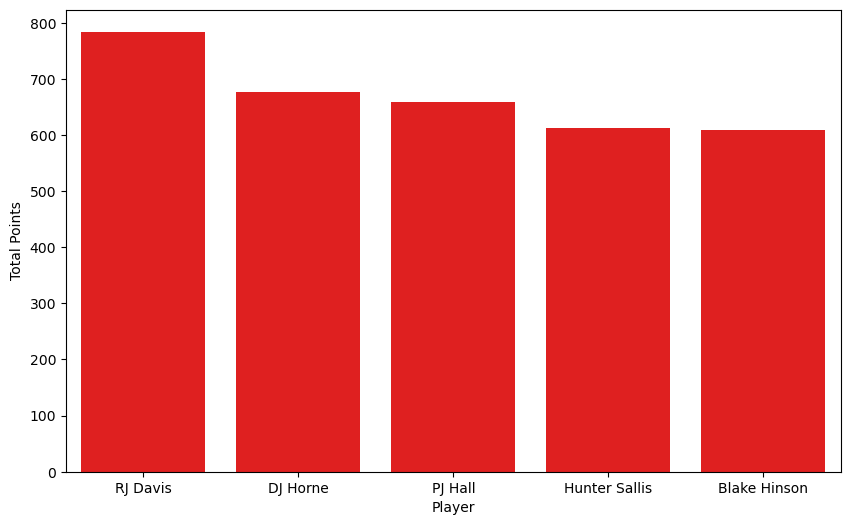

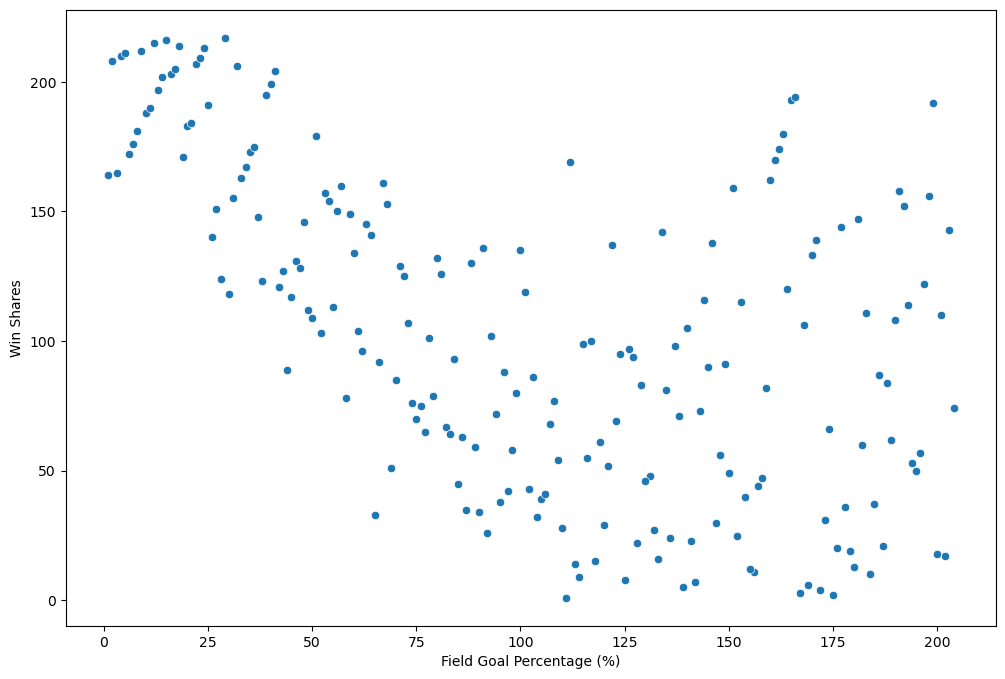

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# BAR CHART
top_5_scorers = acc_df[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='PTS', data=top_5_scorers, color = 'r')
plt.ylabel("Total Points")
plt.show()

# CORRELATION INVESTIGATION
acc_df['FG%_sorted'] = acc_df['FG%'].rank(method='first')
acc_df['WS_sorted'] = acc_df['WS'].rank(ascending=False, method='first')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='FG%_sorted', y='WS_sorted', data=acc_df)
plt.xlabel("Field Goal Percentage (%)")
plt.ylabel("Win Shares")
plt.show()


In [81]:
correlation_coefficient = acc_df['FG%'].corr(acc_df['WS'])
print("Correlation coefficient of FG% and Win Shares:", correlation_coefficient)

Correlation coefficient of FG% and Win Shares: 0.4210663894199787
